### 1. Loading the Data

Import pandas:

In [1]:
import pandas as pd

Load the data:

In [2]:
df = pd.read_csv("s&p500.csv", index_col='Date', parse_dates=True)

Take a quick peek at the data:

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000
2022-12-29,3805.449951,3858.189941,3805.449951,3849.280029,3849.280029,3003680000
2022-12-30,3829.060059,3839.850098,3800.340088,3839.500000,3839.500000,2979870000


### 2. Analyzing the Data

Quick summary statistics of our DataFrame:

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,3283.215944,3301.894648,3262.660734,3283.391821,3283.391821,4.096083e+09
std,716.906855,722.545366,710.808656,716.838804,716.838804,1.054008e+09
min,2251.570068,2263.879883,2191.860107,2237.399902,2237.399902,1.296530e+09
25%,2713.589966,2729.655090,2697.770020,2712.177429,2712.177429,3.418972e+09
50%,3006.380005,3016.780029,2991.500000,3005.584961,3005.584961,3.858670e+09
75%,3919.070007,3945.934998,3892.040039,3916.182434,3916.182434,4.526435e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09


Single column statistics:

In [6]:
df['Close'].min()

2237.39990234375

In [7]:
df['Close'].max()

4796.56005859375

Single column selection:

In [8]:
df['Close'].head()

Date
2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
Name: Close, dtype: float64

#### Visualizations:

A simple line chart showing Close price:

<AxesSubplot: title={'center': 'S&P Closing Price | 2017 - 2022'}, xlabel='Date'>

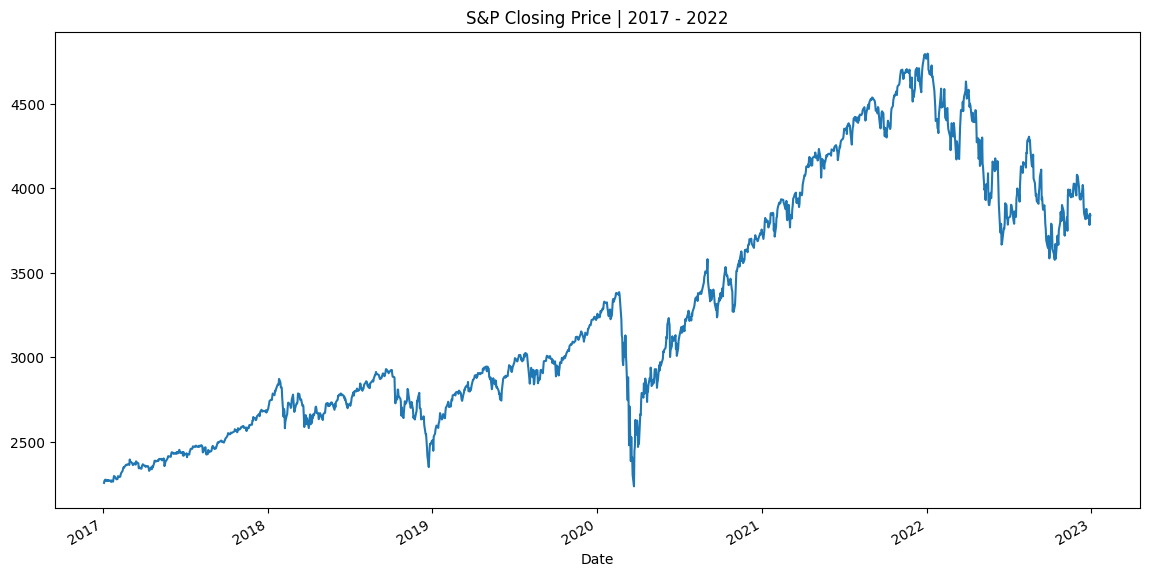

In [9]:
df['Close'].plot(figsize=(14, 7), title='S&P Closing Price | 2017 - 2022')

A more advanced chart combining `Close Price` and `Volume`:

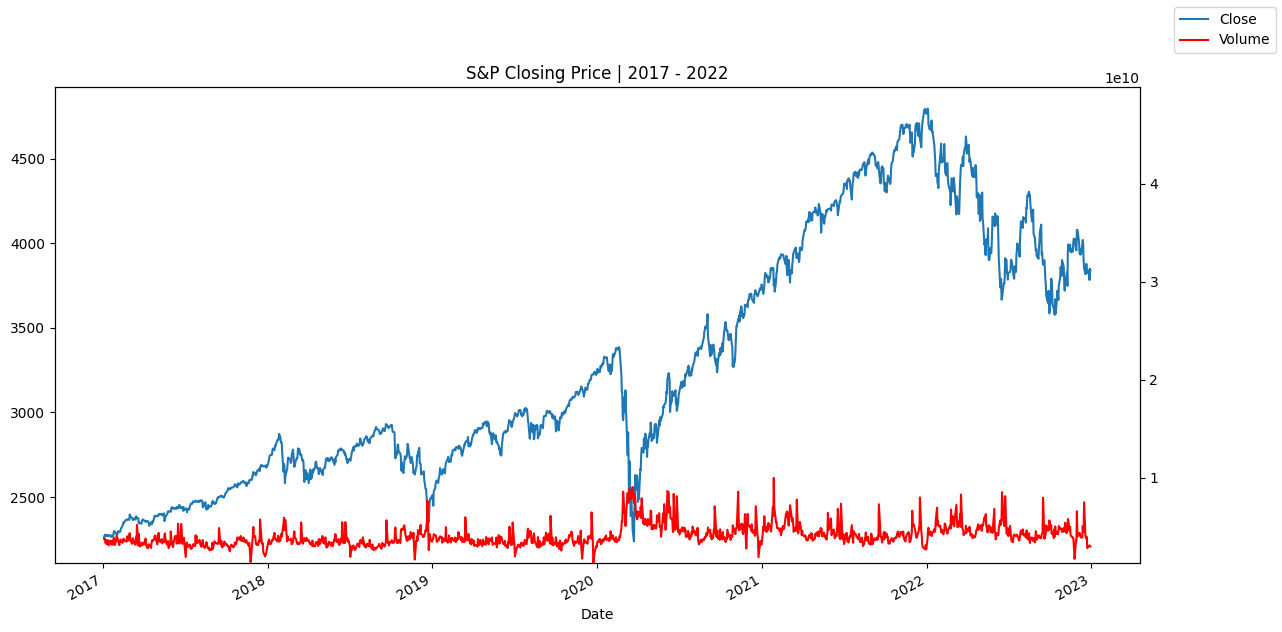

In [10]:
ax1 = df['Close'].plot(figsize=(14, 7), title='S&P Closing Price | 2017 - 2022')

ax2 = ax1.twinx()
df['Volume'].plot(ax=ax2, color='red', ylim=[df['Volume'].min(), df['Volume'].max() * 5])

ax1.figure.legend(["Close", "Volume"])

A few statistical visualizations.

A histogram:

<AxesSubplot: ylabel='Frequency'>

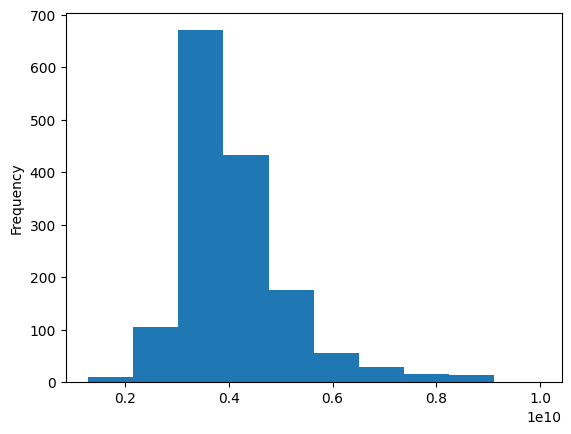

In [11]:
df['Volume'].plot(kind='hist')

A box plot:

<AxesSubplot: >

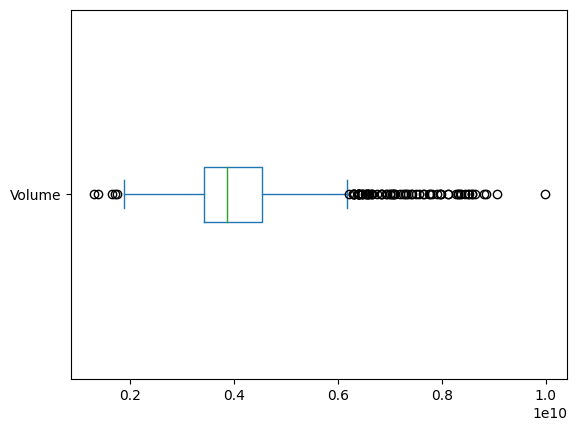

In [12]:
df['Volume'].plot(kind='box', vert=False)

### 3. Data Wrangling

`Close` price and it's SMA (Simple Moving Average):

In [13]:
df['Close SMA'] = df['Close'].rolling(60).mean()

In [14]:
df[['Close', 'Close SMA']].tail(10)

,Close,Close SMA
Date,,
2022-12-16,3852.360107,3835.480680
2022-12-19,3817.659912,3837.554513
2022-12-20,3821.620117,3840.330847
2022-12-21,3878.439941,3844.183346
2022-12-22,3822.389893,3845.905843
2022-12-23,3844.820068,3849.311678
2022-12-27,3829.250000,3853.372176
2022-12-28,3783.219971,3855.118677
2022-12-29,3849.280029,3856.091178


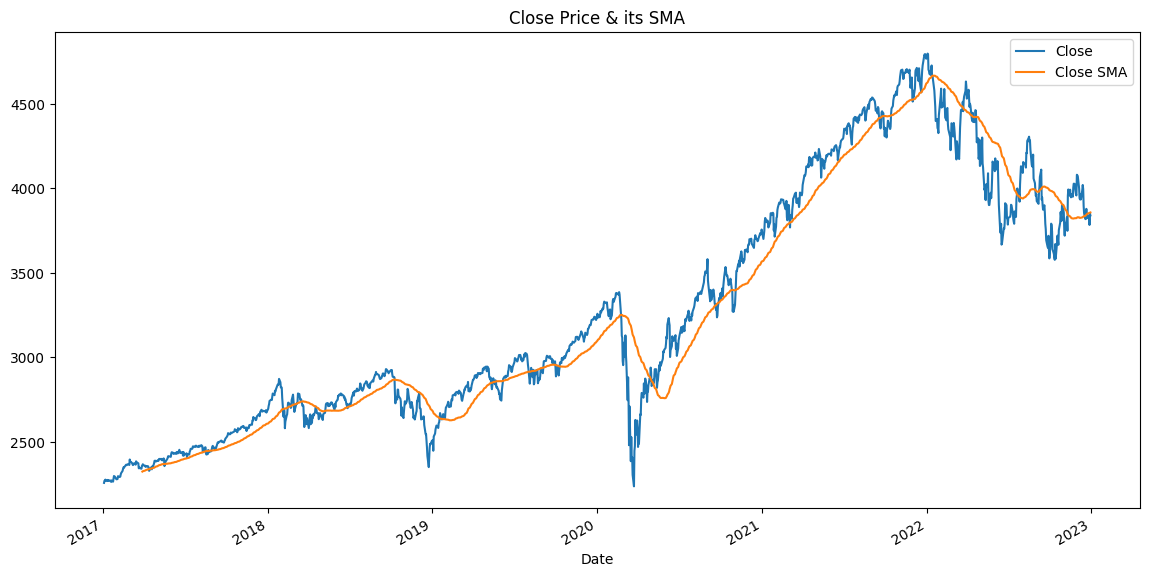

In [15]:
ax = df[['Close', 'Close SMA']].plot(figsize=(14, 7), title='Close Price & its SMA')

Calculate the bands as:

```
Lower Band = Close SMA - 2 * rolling std
Upper Band = Close SMA + 2 * rolling std
```

In [16]:
df['Lower Band'] = df['Close SMA'] - (2 * df['Close'].rolling(60).std())
df['Upper Band'] = df['Close SMA'] + (2 * df['Close'].rolling(60).std())

In [17]:
df[['Close', 'Close SMA', 'Lower Band', 'Upper Band']].tail()

,Close,Close SMA,Lower Band,Upper Band
Date,,,,
2022-12-23,3844.820068,3849.311678,3571.779081,4126.844275
2022-12-27,3829.250000,3853.372176,3584.540551,4122.203801
2022-12-28,3783.219971,3855.118677,3589.568713,4120.668641
2022-12-29,3849.280029,3856.091178,3591.070590,4121.111766
2022-12-30,3839.500000,3857.028178,3592.658018,4121.398338


This is how it looks like:

<AxesSubplot: title={'center': 'Close Price & its SMA'}, xlabel='Date'>

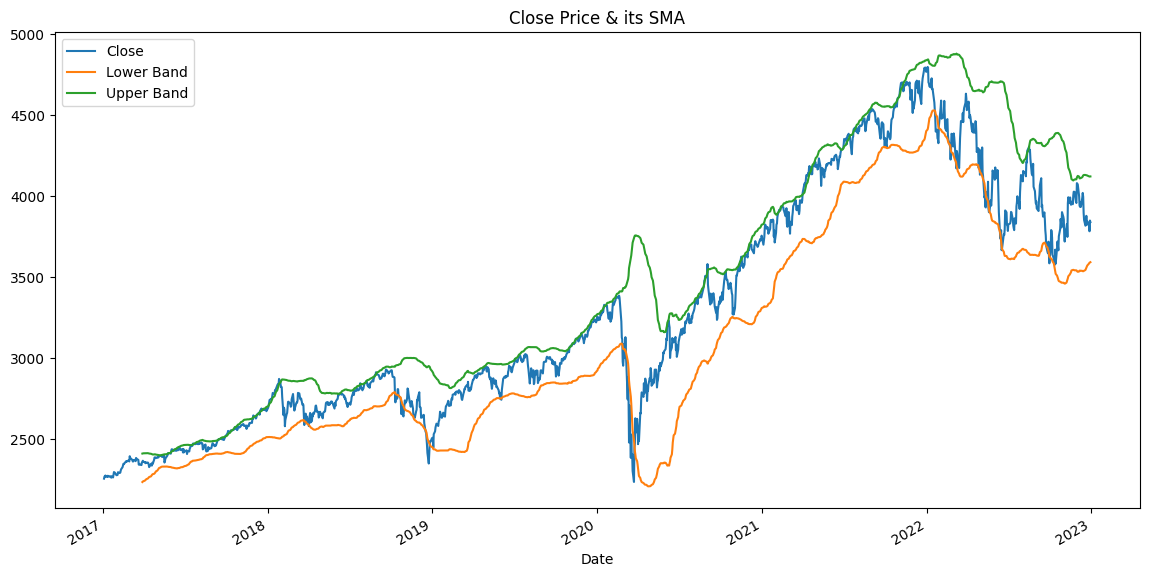

In [18]:
df[['Close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), title='Close Price & its SMA')

Let's find that lower point that crosses the lower band:

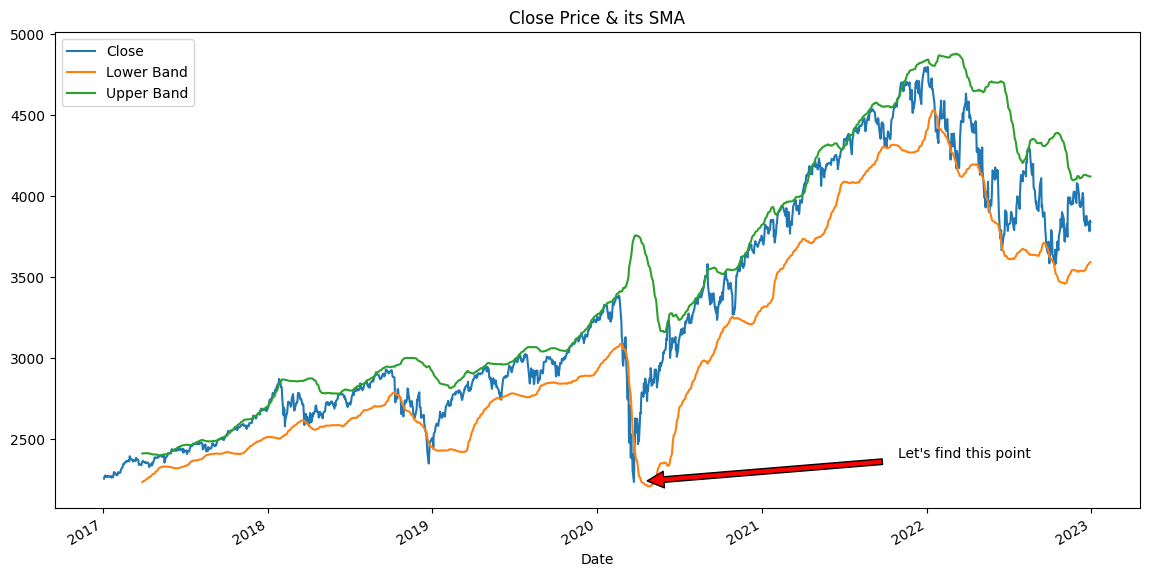

In [19]:
ax = df[['Close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), title='Close Price & its SMA')
ax.annotate(
    "Let's find this point", xy=(pd.Timestamp("2020-03-23"), 2237), 
    xytext=(0.9, 0.1), textcoords='axes fraction',
    arrowprops=dict(facecolor='red', shrink=0.05),
    horizontalalignment='right', verticalalignment='bottom');

We can quickly query all the dates that crossed the lower band (in the period `2020-03-01` to `2020-06-01`)

In [20]:
df.loc['2020-03-01': '2020-06-01'].query("Close < `Lower Band`").head()

,Open,High,Low,Close,Adj Close,Volume,Close SMA,Lower Band,Upper Band
Date,,,,,,,,,
2020-03-03,3096.459961,3136.719971,2976.629883,3003.370117,3003.370117,6376510000,3243.278988,3047.952727,3438.605248
2020-03-05,3075.699951,3083.040039,2999.830078,3023.939941,3023.939941,5579290000,3241.457658,3040.082062,3442.833254
2020-03-06,2954.199951,2985.929932,2901.540039,2972.370117,2972.370117,6555240000,3238.731160,3027.363341,3450.098980
2020-03-09,2863.889893,2863.889893,2734.429932,2746.560059,2746.560059,8441290000,3232.298494,2987.011382,3477.585607
2020-03-10,2813.479980,2882.590088,2734.000000,2882.229980,2882.229980,7642040000,3227.975163,2967.512632,3488.437694


And finally, we can zoom in in that period:

<AxesSubplot: title={'center': 'Close Price & its SMA | 2020-01-01 to 2020-06-01'}, xlabel='Date'>

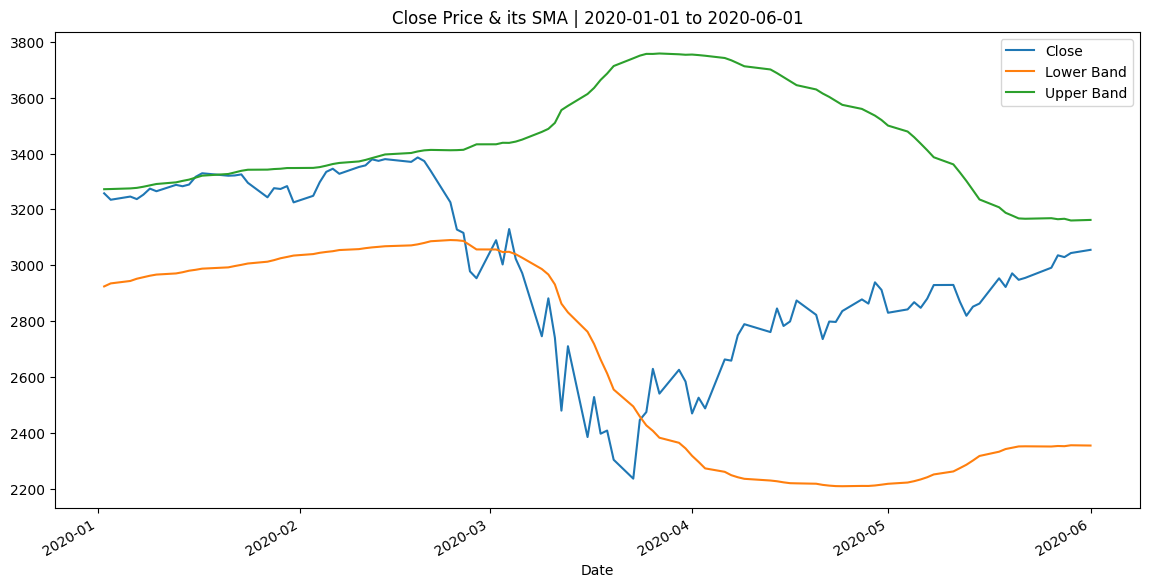

In [21]:
df.loc['2020-01-01': '2020-06-01', ['Close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), title='Close Price & its SMA | 2020-01-01 to 2020-06-01')